In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_digits
from torchvision.datasets import FashionMNIST
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.multivariate_normal import MultivariateNormal

In [2]:
# Controlla la disponibilità della GPU
if torch.cuda.is_available():
    device = torch.device("cuda")  # Imposta il dispositivo sulla GPU
else:
    device = torch.device("cpu")  # Se la GPU non è disponibile, utilizza la CPU

print(device)

cuda


In [ ]:
path_to_model = "/content/"
path_to_output = "/content/my" #crea la cartella "my"

# Dataset 1

In [ ]:
#Abbiamo 1797 campioni, ciascuno 8x8. Ogni immagine è organizzata come un vettore di 64 pixel
fashioneMNIST = FashionMNIST("./", download=True)
fashioneMNIST

print(fashioneMNIST)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train


torch.Size([28, 28])


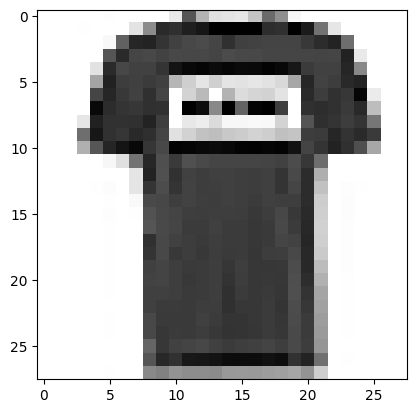

In [ ]:
from matplotlib import pyplot as plt

img1 = fashioneMNIST.data[1]
print(img1.shape)

plt.imshow(img1,cmap='Greys', interpolation='none')


In [ ]:
#essendo ogni riga una immagine allora prendo le prime 50000 come training set, 5000 come validation set e il resto come test set
training_data = fashioneMNIST.data[0:50000].float()
validation_data = fashioneMNIST.data[50000:55000].float()
test_data = fashioneMNIST.data[55000:].float()

In [ ]:
#hyperparameters
input_shape_image = 28*28
possible_pixel_values = 256 # ossia {0,1,...,255}

# Dataset 1 normalizzato tra 0 e 10

In [ ]:
#Abbiamo 1797 campioni, ciascuno 8x8. Ogni immagine è organizzata come un vettore di 64 pixel
fashioneMNIST = FashionMNIST("./", download=True)
fashioneMNIST

print(fashioneMNIST)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train


In [ ]:
d = torch.round(((fashioneMNIST.data / 255) * 10))

torch.Size([28, 28])


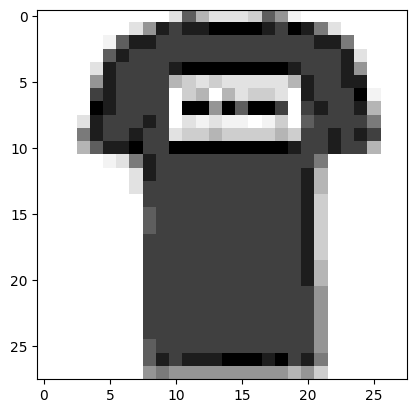

In [ ]:
from matplotlib import pyplot as plt

img1 = d[1]
print(img1.shape)

plt.imshow(img1,cmap='Greys', interpolation='none')


In [ ]:
#essendo ogni riga una immagine allora prendo le prime 50000 come training set, 5000 come validation set e il resto come test set
training_data = d.data[0:2000].float()
validation_data = d.data[2000:3000].float()
test_data = d.data[3000:4000].float()

In [ ]:
#hyperparameters
input_shape_image = 28*28
possible_pixel_values = 11 # ossia {0,1,...,10}

# Dataset 2 (digits)

In [23]:
#Abbiamo 1797 campioni, ciascuno 8x8. Ogni immagine è organizzata come un vettore di 64 pixel
digits_dataset = load_digits()

print(digits_dataset.data.shape)

(1797, 64)


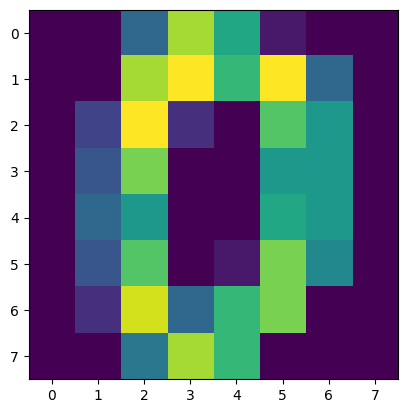

In [24]:
from matplotlib import pyplot as plt
#ogni riga è una immagine. Vediamo un esempio
img1 = digits_dataset.data[0]
#facciamo il reshape del vettore di 64 elementi in 8x8
img1 = np.reshape(img1, (8,8))
plt.imshow(img1)


In [25]:
#essendo ogni riga una immagine allora prendo le prime 1000 come training set, 350 come validation set e il resto come test set
training_data = digits_dataset.data[0:1000].astype(np.float32)
validation_data = digits_dataset.data[1000:1350].astype(np.float32)
test_data = digits_dataset.data[1350:].astype(np.float32)

In [26]:
#hyperparameters
input_shape_image = 8*8
possible_pixel_values = 17 # ossia {0,1,...,16}

# Dataset 3 (locale) Emoticons 72x72

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

folder_path = '/content/drive/MyDrive/Generative_AI/datasets/Emoticons_72x72'

image_data = []

resize_to = 40
max_value = 15

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    print("Carico "+file_path)
    # Carica l'immagine in bianco e nero utilizzando PIL
    img = Image.open(file_path).convert('L')
    # Ridimensiona l'immagine a 10x10 pixel utilizzando numpy
    img_resized = np.array(img.resize((resize_to, resize_to)))
    # Normalizza i valori dei pixel nell'intervallo da 0 a 10 utilizzando numpy
    img_normalized = np.round((img_resized / 255) * max_value).astype(int)
    # Aggiungi l'immagine normalizzata alla lista dei dati
    image_data.append(img_normalized)

# Converti la lista dei dati in un array numpy
image_data = np.array(image_data)

# Ottieni il numero totale di immagini lette
N = image_data.shape[0]

# Reshape dell'array delle immagini in (N, 10, 10)
image_data_reshaped = image_data.reshape(N, resize_to, resize_to)

print(image_data_reshaped.shape)


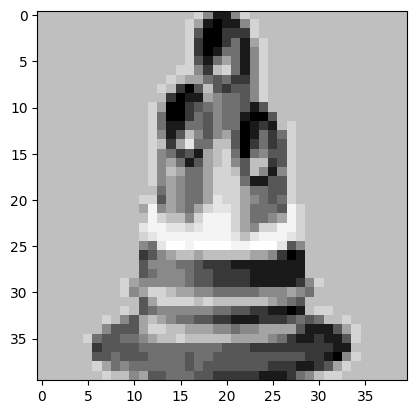

In [ ]:
from matplotlib import pyplot as plt
#ogni riga è una immagine. Vediamo un esempio
img1 = image_data_reshaped[35]
plt.imshow(img1,cmap='Greys', interpolation='none')


In [ ]:
#essendo ogni riga una immagine allora prendo le prime 1000 come training set, 350 come validation set e il resto come test set
training_data = image_data_reshaped[0:1000].astype(np.float32)
validation_data = image_data_reshaped[1000:1800].astype(np.float32)
test_data = image_data_reshaped[1800:].astype(np.float32)

In [ ]:
#hyperparameters
input_shape_image = resize_to*resize_to
possible_pixel_values = max_value+1 # ossia {0,1,...,max_value}

# Dataset 4 (locale) Emoticons 15x15

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

folder_path = '/content/drive/MyDrive/Generative_AI/datasets/Emoticons_15x15'

image_data = []

resize_to = 15
max_value = 20

#emoticons with a smile
index_of_example = -1
i=0
for filename in os.listdir(folder_path):
    if filename=="9.png":
      index_of_example = i
    file_path = os.path.join(folder_path, filename)
    print("Carico "+file_path)
    # Carica l'immagine in bianco e nero utilizzando PIL
    img = Image.open(file_path).convert('L')
    # Ridimensiona l'immagine a 10x10 pixel utilizzando numpy
    img_resized = np.array(img.resize((resize_to, resize_to)))
    # Normalizza i valori dei pixel nell'intervallo da 0 a 10 utilizzando numpy
    img_normalized = np.round((img_resized / 255) * max_value).astype(int)
    # Aggiungi l'immagine normalizzata alla lista dei dati
    image_data.append(img_normalized)
    i=i+1

# Converti la lista dei dati in un array numpy
image_data = np.array(image_data)

# Ottieni il numero totale di immagini lette
N = image_data.shape[0]

# Reshape dell'array delle immagini in (N, 10, 10)
image_data_reshaped = image_data.reshape(N, resize_to, resize_to)

print(image_data_reshaped.shape)


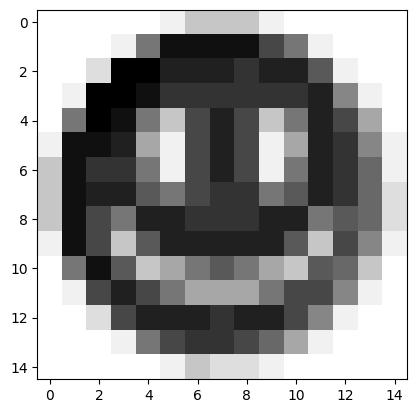

In [ ]:
from matplotlib import pyplot as plt
#ogni riga è una immagine. Vediamo un esempio
img1 = image_data_reshaped[index_of_example]
plt.imshow(img1,cmap='Greys', interpolation='none')


In [ ]:
#essendo ogni riga una immagine allora prendo le prime 1000 come training set, 350 come validation set e il resto come test set
training_data = image_data_reshaped[0:1000].astype(np.float32)
validation_data = image_data_reshaped[1000:1500].astype(np.float32)
test_data = image_data_reshaped[1500:].astype(np.float32)

In [ ]:
#hyperparameters
input_shape_image = resize_to*resize_to
possible_pixel_values = max_value+1 # ossia {0,1,...,max_value}

# Dataset 5 (Frey Face)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io

# Carica il file .mat
data = scipy.io.loadmat('/content/drive/MyDrive/Generative_AI/datasets/frey_rawface.mat')

In [ ]:
data = data['ff'].T
data

array([[ 81, 136, 167, ..., 152, 158, 164],
       [ 85, 138, 165, ..., 167, 178, 184],
       [ 87, 139, 166, ..., 172, 177, 183],
       ...,
       [ 80,  84, 155, ..., 111, 186, 182],
       [ 73,  86, 131, ..., 135, 167, 177],
       [ 58,  89, 110, ..., 166, 177, 184]], dtype=uint8)

In [ ]:
data = data.reshape(1965,28,20)

In [ ]:
from PIL import Image
# Converte la matrice in un oggetto immagine di tipo Pillow
image_list = [Image.fromarray(data[i]) for i in range(data.shape[0])]

# Ridimensiona tutte le immagini nella lista all'altezza e larghezza desiderate
new_image_list = [image.resize((28, 28)) for image in image_list]

# Converti le immagini ridimensionate in una nuova matrice
resized_data = np.array([np.array(image) for image in new_image_list])

max_value = 20
#normalizza
img_normalized = np.round((resized_data / 255) * max_value).astype(int)

(28, 28)


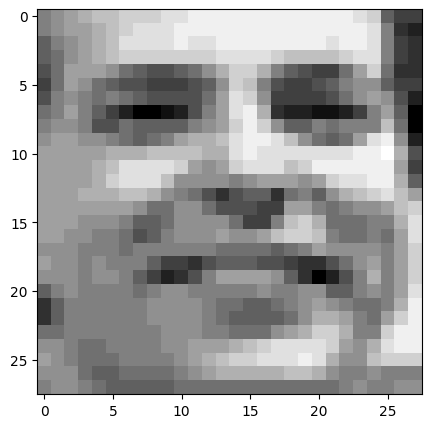

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
#ogni riga è una immagine. Vediamo un esempio
img1 = img_normalized[1120]
print(img1.shape)
plt.imshow(img1)


In [ ]:
#essendo ogni riga una immagine allora prendo le prime 1000 come training set, 350 come validation set e il resto come test set
training_data = img_normalized[0:1300].astype(np.float32)
validation_data = img_normalized[1300:1800].astype(np.float32)
test_data = img_normalized[1800:].astype(np.float32)

In [ ]:
#hyperparameters
resize_to = 28
input_shape_image = resize_to*resize_to
possible_pixel_values = max_value+1 # ossia {0,1,...,max_value}

# Dataset 6 (Celeb face)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path_to_model = "/content/drive/MyDrive/Generative_AI/datasets/celebA/model"
path_to_output = "/content/drive/MyDrive/Generative_AI/datasets/celebA/output"

preprocessing

In [ ]:
import os
import numpy as np
from PIL import Image
from torchvision import transforms

# Imposta il percorso della cartella contenente le immagini
#scarica prima img_align_celeba.zip da https://drive.google.com/drive/u/0/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
folder_path = "/content/drive/MyDrive/Generative_AI/datasets/celebA/all"

# Imposta le dimensioni di resize desiderate
resize_to = 100  # Specifica la larghezza (W) e l'altezza (H)
max_value = 20

# Crea una lista per salvare le immagini pre-elaborate
processed_images = []

# Crea una trasformazione di pre-elaborazione utilizzando torchvision.transforms.Compose
preprocess = transforms.Compose([
    transforms.Resize((resize_to,resize_to)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize(0, max_value),
])

# Itera sui file nella cartella
i=0
for file_name in os.listdir(folder_path):
    print(i+1," -> ",file_name)
    i=i+1
    # Crea il percorso completo del file
    file_path = os.path.join(folder_path, file_name)

    # Carica l'immagine utilizzando PIL
    image = Image.open(file_path)

    # Applica le trasformazioni di pre-elaborazione all'immagine
    processed_image = preprocess(image)

    # Aggiungi l'immagine pre-elaborata alla lista
    processed_images.append(processed_image)

# Converte la lista di immagini in una matrice numpy
image_matrix = np.stack(processed_images)

# Ottieni le dimensioni della matrice delle immagini
N, W, H = image_matrix.shape[0], image_matrix.shape[1], image_matrix.shape[2]

# Visualizza le dimensioni della matrice delle immagini
print("Dimensioni della matrice delle immagini:", (N, W, H))


In [ ]:
import numpy as np
# Imposta il percorso del file di output
file_path = "/content/drive/MyDrive/Generative_AI/datasets/celebA/celebA.npy"

# Salva l'array nel file utilizzando np.save()
np.save(file_path, processed_images)

print("Array salvato correttamente.")


In [5]:
file_path = "/content/drive/MyDrive/Generative_AI/datasets/celebA/celebA.npy"
dataset = np.load(file_path,allow_pickle=True)

dataset.size

28638

In [6]:
image_matrix = np.stack(dataset)
image_matrix.squeeze(1).shape

(28638, 100, 100)

In [7]:
from scipy import ndimage
import torchvision.transforms as transforms

resize_to = 90

# Converti ndarray in tensor PyTorch
input_tensor = torch.from_numpy(image_matrix)


# Crea una trasformazione per il ridimensionamento
resize = transforms.Resize((resize_to, resize_to))


# Applica la trasformazione al tensor
output_tensor = resize(input_tensor)

# Converti il tensor in ndarray
image_matrix = output_tensor.numpy()



/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [7]:
max_value = 20
image_matrix = (image_matrix*20*max_value).astype(int)

(100, 100)


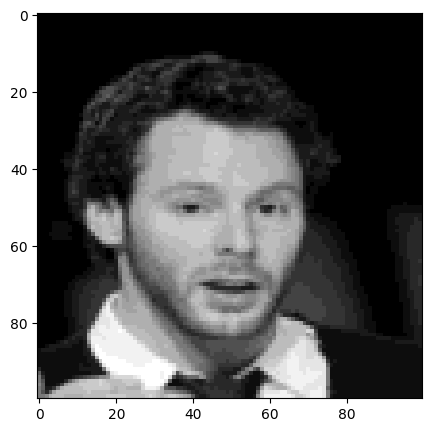

In [8]:
plt.rcParams['figure.figsize'] = (5, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
#ogni riga è una immagine. Vediamo un esempio
img1= image_matrix[100].squeeze(0)
print(img1.shape)
plt.imshow(img1)


In [9]:
#essendo ogni riga una immagine allora prendo le prime 50000 come training set, 5000 come validation set e il resto come test set
training_data = image_matrix.squeeze(1)[0:26000]
validation_data = image_matrix.squeeze(1)[26000:]
#test_data = d.data[3000:4000]

In [12]:
#hyperparameters
resize_to = 100 # se hai fatto il resize prima, commenta
input_shape_image = resize_to*resize_to
possible_pixel_values = max_value+1 # ossia {0,1,...,20}

In [13]:
import gc

#elimino per liberare memoria
del image_matrix
del dataset
#forzo il garbage collector a operare adesso
gc.collect()

45

# DataLoader

Non alleneremo la rete dandole tutti i dati, ma batch dopo batch. Creiamo quindi un DataLoader che semplicemente dividerà i dati in batch da 64 immagini (dopo averli mischiati) e ci restituirà, quando richiesto, un batch alla volta.

In [14]:
training_loader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=16, shuffle=True)
#test_loader = DataLoader(test_data, batch_size=256, shuffle=True)

# Model (no-gpu ma più chiaro da comprendere) (Vedi sotto per la versione gpu)

hyperparameters

In [47]:

#definisco la dimensione dello spazio latente
latent_space_dimension = 32
#nuumero di hidden neurons nell'encoder e decoder
number_of_hidden_neurons = 256

Encoder

In [48]:
class Encoder(nn.Module):
  def __init__(self, input_shape_image, latent_space_dimension, number_of_hidden_neurons, L):
    super(Encoder,self).__init__()

    #numero di campioni per l'approssimazione Monte-Carlo dell'Expected Value
    self.L = L

    self.input_shape_image = input_shape_image

    self.latent_space_dimension = latent_space_dimension

    self.encoder = nn.Sequential(nn.Linear(input_shape_image,number_of_hidden_neurons*2),
                                 nn.LeakyReLU(),
                                 nn.Linear(number_of_hidden_neurons*2,number_of_hidden_neurons),
                                 nn.LeakyReLU(),
                                 #moltiplico per 2 perchè voglio sia il vettore di media che std (diagonale)
                                 nn.Linear(number_of_hidden_neurons,2*latent_space_dimension))
    
  def KL_loss(self,log_std_vector,mean_vector, batch_length):

    '''
      Per approssimare l'expected value E[ln(q|z)]-E[ln(p(z))] utilizzo un approccio 
      Monte-Carlo approssimando ciascun expected value con L volte le quantità interne
      che ottengo per L campionamenti di z
    '''
    print("ENCODER: Calcolo KL_loss e ritorno dei vettori z")
    L = self.L

    #contiene le KL_loss ottenute da ogni immagine
    KL_loss = torch.zeros(batch_length)

    #creo la prior p(z)=N(z|0,I), è sempre la stessa
    p_z = MultivariateNormal(torch.zeros(self.latent_space_dimension), torch.eye(self.latent_space_dimension))

    #nota che ho un vettore di medie e std per ogni immagine, quindi devo calcolare
    #KL_loss diverse volte e poi alla fine ottenere un unico KL_loss per media
    #print("Per ",batch_length, " immagini...")

    #siccome al decoder serviranno gli stessi z che io qui sto campionando, allora me li salvo
    z_sampled_per_image = torch.zeros(batch_length,L,self.latent_space_dimension)

    for x_i in np.arange(batch_length):
      print("   Considero immagine "+str(x_i))
      
      mean_vector_i = mean_vector[x_i]
      log_std_vector_i = log_std_vector[x_i]
      print("     mean-vector ",mean_vector_i)
      print("     std-vector ",log_std_vector_i)
      #print("dimensione vettore medie: ",mean_vector_i.shape)
      #print("dimensione vettore ln std: ",log_std_vector_i.shape)

      #calcolo la distribuzione multivariata q(z|x) creata da quell'x
      q_z_x = MultivariateNormal(mean_vector_i, torch.eye(self.latent_space_dimension)*torch.exp(log_std_vector_i))

      #KL per l'immagine corrente
      KL_per_image = 0
      #le due due quantità che andranno sottratte per calcolare KL_per_image
      quantity1 = 0
      quantity2 = 0

      print("     Campiono  ",L," vettori z")
      #campiono L vettori z
      for i in np.arange(L):

        #Campiono z^(i)

        #campiono le 64 componenti z^(i)_j con la tecnica della reparametrizzazione
        #converto il logaritmo della deviazione standard in deviazione standard pura
        std = torch.exp(0.5*log_std_vector_i)
        #print(std.shape)
        #campiono N eps dove N è la dimensione del vettore eps (64) da una N(0,1)
        eps = torch.randn_like(std)
        #print(eps.shape)
        #campiono le 64 componenti diz da N(u,E) che equivale a campionare 
        #ciascuna componente z_i come z_i = u_i + std_i*eps_i
        z = mean_vector_i + std*eps
        #z è una vettore (1,64)
        #me lo salvo (servirà dopo al decoder)
        z_sampled_per_image[x_i,i,:] = z
        

        #calcolo ln(q(z|x))
        ln_q_z_x = q_z_x.log_prob(z)
        
        #da eliminare (TODO)
        da_eliminare1 = -0.5 * z.shape[0] * torch.log(2. * PI) - 0.5 * log_std_vector_i - 0.5 * torch.exp(-log_std_vector_i) * (z - mean_vector_i)**2.
        print("****** Confronto tra la mia ln(q(z|x) e quella del libro: ",ln_q_z_x, "  VS  ",da_eliminare1.sum(-1), "   con D=",z.shape[0])
        
        #calcolo ln(p(z))
        ln_p_z = p_z.log_prob(z)

        #print(ln_q_z_x,"   ",ln_p_z)
        print("       Inserisco nella matrice di vettori campionati ",z_sampled_per_image, " con ln(q(z|x))= ",ln_q_z_x, " e ln(p(z))=",ln_p_z)

        quantity1 = quantity1 + ln_q_z_x #Sommatoria(ln(q(z|x)))
        quantity2 = quantity2 + ln_p_z   #Sommatoria(ln(p(z)))
        print("       Aggiorno le sommatorie -->Sommatoria(ln(q(z|x)))=",quantity1,"   Sommatoria(ln(p(z)))=",quantity2)

      #calcolo KL (Monte-Carlo) per la corrente immagine di input
      # SUM(ln(q(z|x))) - SUM(ln(p(z)))
      KL_per_image = quantity1/L - quantity2/L
      print(" Calcolo il KL_per_image=", KL_per_image)
      
      #Terminato, ho la KL dell'immagine corrente, la salvo nel vettore
      KL_loss[x_i] = KL_per_image
      print(" Aggiorno il KL_loss=", KL_loss)
    
    #Terminato, avremo una KL_loss che conterrà le KL_loss di ogni immagine (sommate).
    # Non ne calcolo la media adesso, ma dopo perchè ho bisogno del RE

    return KL_loss,z_sampled_per_image


    #La rete ritorna il vettore di media, std (diagonale) e la z campionata
  def forward(self, x):
    #flatto il batch (64, 28, 28) in (64, 784)
    x = torch.flatten(x,1)
    #print(x.shape)
    #do alla rete x e prelevo vettore di media e std (diagonale)
    output = self.encoder(x)
    #print(output.shape)
    #divido il risultato in due parti: media e std (diagonale)(logaritmica)
    mean_vector, log_std_vector = torch.chunk(output, 2, dim=1)
    #print(mean_vector.shape)
    #print(log_std_vector.shape)


    #Calcoliamo la prima parte della Loss, chiamata KL(q(u,E)||p(z)) dove per semplicità
    #approssimiamo l'expected value con un Monte-Carlo approach di L pari a L.
    #La loss ottenuta è un vettore contenente la KL per ogni immagine
    KL_loss_vector, z_samples_per_image = self.KL_loss(log_std_vector,mean_vector, x.shape[0])
    #print("KL_loss ",KL_loss)
    print("Encoder (forward): ritorno quanto ottenuto")
    print(" Kl-loss  -> ",KL_loss_vector)
    print(" z-samples  ->",z_samples_per_image)
    return KL_loss_vector,z_samples_per_image



Decoder

In [49]:
class Decoder(nn.Module):
  def __init__(self, input_shape_image,latent_space_dimension, number_of_hidden_neurons, possible_pixel_values, L):
    super(Decoder,self).__init__()

    self.L = L

    self.input_shape_image = input_shape_image

    self.latent_space_dimension = latent_space_dimension

    self.possible_pixel_values = possible_pixel_values

    self.decoder = nn.Sequential(nn.Linear(latent_space_dimension,number_of_hidden_neurons),
                                 nn.LeakyReLU(),
                                 nn.Linear(number_of_hidden_neurons,number_of_hidden_neurons*2),
                                 nn.LeakyReLU(),
                                 nn.Linear(number_of_hidden_neurons*2, input_shape_image*possible_pixel_values),
                                 )
    
  
  def sample(self):
    #creo la prior p(z)=N(z|0,I), è sempre la stessa
    p_z = MultivariateNormal(torch.zeros(self.latent_space_dimension), torch.eye(self.latent_space_dimension))
    z_sample = p_z.sample()


    #inietto nel decoder:
    z_sample = z_sample.unsqueeze(0)

    #(1,1,784*256)
    logits = self.decoder(z_sample)

    #(1,784,256)
    logits = logits.reshape(1, self.input_shape_image, self.possible_pixel_values )

    probabilities = torch.softmax(logits, dim=-1)
    #non applico la softmax per convertirli in probabilità perchè
    #la multinomial di torch accetta anche le logits
    probabilities = probabilities.view(-1, self.possible_pixel_values)

    sample = torch.multinomial(probabilities, num_samples=1)

    x = sample.view(self.input_shape_image) 
    return x



  #alla rete inietto lo z campionato da q(z|x) ma anche l'x che deve ricostruire
  def forward(self, z, x):
    
    x = torch.flatten(x,1)
    '''
      il decoder da in output 784*256 probabilità per ciascuna z
      Avendo (N, L, 64) con N numero di immagini, L=10 z campionati e 64 
      ciascuna lunghezza, allora il decoder produrrà (N,L, 784*256), ossia
      per ogni immagine le probabilità che ha x per ogni z campionato
    '''
    output_probabilities = self.decoder(z)

    '''
      Voglio calcolare la discrepanza tra l'x predetto dallo z^(i) e l'x vero.
      Siccome ho L vettori z e per ciscuno le pseudo probabilità, allora 
    '''
    batch_size = x.shape[0]

    L = self.L

    #qui salvo il reconstruction error finale
    RE = 0
    #per ogni batch di immagini calcolo la discrepanza tra loro e ciò che il 
    #vettore z^(i) ha prodotto
    #print(x.shape)
    for i in np.arange(L):

      #prendo per ogni immagine, le pseudo probabilità che ha generato z^(i)
      #quindi ho (N, 784*256)
      output_probabilities_zi = output_probabilities[:,i,:]
      #faccio il reshape in maniera tale da avere (N, 784, 256), quindi
      #per ciascuno dei 784 pixel i 256 valori di pseudo probabilità
      output_probabilities_zi = output_probabilities_zi.reshape(batch_size, self.input_shape_image, self.possible_pixel_values )
      #applico la softmax per convertirli in probabilità
      output_probabilities_zi = torch.softmax(output_probabilities_zi,2)

      EPS = 1.e-5
      #Per ogni immagine calcolo ln(p(x|z^i))=ln(p(x1|z^i))+..+ln(p(x784|z^i))
      #trasformo ogni pixel di ogni immagine in one hot encoding
      x_one_hot = F.one_hot(x.long(), num_classes = self.possible_pixel_values)
      #calcolo il logaritmo delle probabilità e seleziono solo quelle che mi interessano
      log_p = x_one_hot * torch.log(torch.clamp(output_probabilities_zi, EPS,1. - EPS))
      #per ogni pixel di una immagine isolo solo la probabilità finale di accadere
      vector_of_probabilities_per_image = torch.sum(log_p, dim=2) 
      #per ogni immagine sommo tutti i logaritmi di probabilità dei pixel
      RE_per_image = vector_of_probabilities_per_image.sum(dim=1)
      
      #ogni RE_per_image ha dimensione (N), ossia contiene per un certo x degli N
      # la ln(p(x|z^i)). La sommo a quella ottenuta con i precedenti z^i
      RE = RE + RE_per_image
      
      
      '''
      print(output_probabilities_zi.shape)
      print(output_probabilities_zi.sum(2).shape)
      print(log_p.shape)
      print(RE_per_image.shape)
      print(RE_per_image)
      '''
    
    '''
      Per ogni immagine x io volevo come reconstruction error (RE) una approssimazione
      dell'expected value E[p(x|z^i)], ossia 1/L*Sum(ln(p(x|z^i))). Il vettore mle contiene
      nella posizione i-esima proprio tale Sum relativa all'immagine i-esima. Dividiamo
      quindi il vettore per L cosi da ottenerne la media
    '''
    RE = RE / L

    #Ho un RE per ogni immagine. Non ne calcolo la media perchè devo considerare il KL

    return RE


    
    #converto il batch x nel formato (N,1,28,28) cosi da applicare un codice che 
    #conosco già per un rapido calcolo della sparse cross entropy
  


VAE

In [50]:
class VAE(nn.Module):
  def __init__(self, possible_pixel_values, input_shape_image, latent_space_dimension, number_of_hidden_neurons,L ):
    super(VAE, self).__init__()

    self.encoder = Encoder(input_shape_image,latent_space_dimension,number_of_hidden_neurons,L)
    self.decoder = Decoder(input_shape_image,latent_space_dimension,number_of_hidden_neurons,possible_pixel_values,L)

  def sample(self):
    return self.decoder.sample()

  def forward(self, x):
    #inietto x nell'encoder per ottenere la KL loss e i vettori z campionati (Monte-Carlo)
    KL_loss, z_samples_per_image = self.encoder.forward(x)

    #inietto nel decoder x per essere ricostruito attraverso gli stessi campioni z
    #e per ottenere il reconstruction error
    RE_loss = self.decoder.forward(z_samples_per_image,x)

    #sommo per ottenere una approssimazione del ln(p(x))
    ln_p = KL_loss - RE_loss

    #calcolo la media del batch
    ln_p_mean = ln_p.mean()

    return ln_p_mean

# Model (adattato per gpu)

hyperparameters

In [15]:

#definisco la dimensione dello spazio latente
latent_space_dimension = 45
#nuumero di hidden neurons nell'encoder e decoder
number_of_hidden_neurons = 128

Encoder

In [17]:
class Encoder(nn.Module):
  def __init__(self, input_shape_image, latent_space_dimension, number_of_hidden_neurons, L,type_of_encoder = 2):
    super(Encoder,self).__init__()

    #numero di campioni per l'approssimazione Monte-Carlo dell'Expected Value
    self.L = L

    self.type_of_encoder = type_of_encoder

    self.input_shape_image = input_shape_image

    self.latent_space_dimension = latent_space_dimension

    self.encoder = nn.Sequential(nn.Linear(input_shape_image,number_of_hidden_neurons*2),
                                 nn.LeakyReLU(),
                                 nn.Linear(number_of_hidden_neurons*2,number_of_hidden_neurons),
                                 nn.LeakyReLU(),
                                 #moltiplico per 2 perchè voglio sia il vettore di media che std (diagonale)
                                 nn.Linear(number_of_hidden_neurons,2*latent_space_dimension))
    
    self.encoder2 = nn.Sequential()
    '''nn.Sequential(nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
                                  nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
                                  nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
                                  nn.Conv2d(16, 1, kernel_size=3, stride=1, padding=1),
                                  nn.Flatten(),
                                  nn.Linear(input_shape_image*1,2*latent_space_dimension),
                                  nn.LeakyReLU())'''

  def KL_loss(self,log_std_vector,mean_vector, batch_length):

    L = self.L 

    #print("Mean-vector", str(mean_vector), "  shape:",mean_vector.shape)
    #print("log-Std-vector", str(log_std_vector), "  shape:",log_std_vector.shape)

    #trasformo i logaritmi delle std in std
    std_vector = torch.exp(log_std_vector)

    #print("Std vectors: ",std_vector.device)

    #siccome devo avere una matrice positiva definita (cholesky decomposition) devo
    #assicurarmi che i valori nelle diagonali non siano proprio zero
    EPS = 1.e-5
    std_vector = torch.clamp(std_vector, EPS,1. - EPS)

    #trasformo le sequenze di varianze in matrici diagonali (covarianza)
    covariance_matrixes = torch.diag_embed(std_vector)

    #print("Matrici di covarianza",covariance_matrixes.device, "  di shape ", covariance_matrixes.shape )

    #calcolo N distribuzioni  multivariate q(z|x) creata da ognuno degli N x
    q_z_x = MultivariateNormal(mean_vector, covariance_matrixes)

    '''
      per ciascuna distribuzione campiono L vettori z
      Nota però che anche se campiono L vettori da ciascuna, il risultato
      conterrà i primi N vettori z campionati, poi i secondi N e cosi via fino
      agli L-esimi. Per esempio i primi due z1 e z2 sono stati campionati da due
      distribuzioni diverse! Quindi non ho blocchi da L vettori z appartenenti 
      alla stessa distribuzione!
    '''
    #dimensione (L, num_distribuzioni, dim_latente)
    z_samples = q_z_x.rsample((L,)) #r sta per "reparametrization trick"
    #print("samples: ", z_samples.device)
    #print("Shape samples: ", z_samples.shape)

    '''
      calcolo per ciascuno e sulla rispettiva distribuzione il log della prob
      Ho una matrice (L, N), dove ogni "colonna" contiene le probabilità degli
      z campionati dalla "stessa" distribuzione. 
    '''
    z_log_probs = q_z_x.log_prob(z_samples)
    #print("log q(z|x)",z_log_probs.device)
    #print("Shape q(z|x): ", z_log_probs.shape)

    '''
      Per ogni sample z calcolo la p(z). Otterrò una matrice (L, N), dove ogni 
      "colonna" contiene le probabilità degli z campionati dalla "stessa" distribuzione q(z|x)
    '''
    #creo la prior p(z)=N(z|0,I), è sempre la stessa
    p_z = MultivariateNormal(torch.zeros(self.latent_space_dimension).to(device), torch.eye(self.latent_space_dimension).to(device))

    ln_p_z = p_z.log_prob(z_samples)

    #print("ln_p(z)=",ln_p_z.device)
    #print("Shape di ln(p(z)) ",ln_p_z.shape)

    '''
      Ora per ogni immagine x io ho campionato L vettori z e per ciascuno ho
      valutato sia ln(q(z|x)) che ln(p(z)). Per ogni immagine io volevo calcolare
      l'expected value approssimandolo (Monte Carlo) come:

                        KL = [Sum(ln(q(z|x)))/L - Sum(ln(p(z))/L)

      Per ottenere la prima sommatoria, sommo le colonne di z_log_probs, mentre
      per la seconda sommo le colonne della matrice ln_p_z. Dopodichè, ottenuti
      due vettori, li divido per L e li sottraggo tra cosi da ottenere l'approssimazione
      della KL per ogni immagine x in ingresso
    '''

    KL_per_image = z_log_probs.sum(0)/L - ln_p_z.sum(0)/L
    #print("KL_per_image",KL_per_image.device)
    
    return KL_per_image,z_samples
  

    #La rete ritorna il vettore di media, std (diagonale) e la z campionata
  def forward(self, x):
    if (self.type_of_encoder == 1 or self.type_of_encoder == 2):
      #flatto il batch (64, 28, 28) in (64, 784)
      x = torch.flatten(x,1)#.to(device)
      #do alla rete x e prelevo vettore di media e std (diagonale)
      output = self.encoder(x)#.to(device)
    else:
      x = x.unsqueeze(1)
      #do alla rete x e prelevo vettore di media e std (diagonale)
      output = self.encoder2(x)#.to(device)


    #print(output.device)
    #print(output.shape)
    #divido il risultato in due parti: media e std (diagonale)(logaritmica)
    mean_vector, log_std_vector = torch.chunk(output, 2, dim=1)
    #print(mean_vector.device)
    #print(log_std_vector.device)


    '''
      Ottengo un KL_error (N,) contenente per ogni immagine il relativo KL_error,
      e poi una matrice z_samples (L, N, dim_latente)
    '''
    KL_per_image, z_samples = self.KL_loss(log_std_vector,mean_vector, x.shape[0])
    #print("KL_per_image: ",KL_per_image)
    #print("Z-samples:", z_samples)

    return KL_per_image,z_samples



Decoder

In [18]:
class Decoder(nn.Module):
  def __init__(self, input_shape_image,latent_space_dimension, number_of_hidden_neurons, possible_pixel_values, L, type_of_decoder = 2):
    super(Decoder,self).__init__()

    self.L = L

    self.type_of_decoder = type_of_decoder

    self.input_shape_image = input_shape_image

    self.latent_space_dimension = latent_space_dimension

    self.possible_pixel_values = possible_pixel_values

    self.decoder = nn.Sequential(nn.Linear(latent_space_dimension,number_of_hidden_neurons),
                                 nn.LeakyReLU(),
                                 nn.Linear(number_of_hidden_neurons,number_of_hidden_neurons*2),
                                 nn.LeakyReLU(),
                                 nn.Linear(number_of_hidden_neurons*2,number_of_hidden_neurons*3),
                                 nn.LeakyReLU(),
                                 nn.Linear(number_of_hidden_neurons*3, input_shape_image*possible_pixel_values),
                                 )
    
    self.decoder2 = nn.Sequential()
    '''
                                nn.Linear(latent_space_dimension, input_shape_image * 16),
                                nn.Unflatten(2, (input_shape_image, 16)),
                                nn.ConvTranspose2d(input_shape_image, 16, kernel_size=3, stride=1, padding=1),
                                nn.ConvTranspose2d(16, 32, kernel_size=3, stride=1, padding=1),
                                nn.ConvTranspose2d(32, 64, kernel_size=3, stride=1, padding=1),
                                nn.ConvTranspose2d(64, 1, kernel_size=3, stride=1, padding=1),
                                nn.Flatten(),
                                nn.Linear(input_shape_image*16, input_shape_image*possible_pixel_values)
                            )'''

  
  def sample(self):
    #creo la prior p(z)=N(z|0,I), è sempre la stessa
    p_z = MultivariateNormal(torch.zeros(self.latent_space_dimension), torch.eye(self.latent_space_dimension))
    z_sample = p_z.sample().to(device)
    #print("z_sample ",z_sample.device)


    #inietto nel decoder:
    z_sample = z_sample.unsqueeze(0)

    if self.type_of_decoder == 1:
          #(1,1,784*256)
      logits = self.decoder(z_sample)
    else:
      logits = self.decoder(z_sample)


    #(1,784,256)
    logits = logits.reshape(1, self.input_shape_image, self.possible_pixel_values )

    probabilities = torch.softmax(logits, dim=-1)
    #non applico la softmax per convertirli in probabilità perchè
    #la multinomial di torch accetta anche le logits
    probabilities = probabilities.view(-1, self.possible_pixel_values)

    sample = torch.multinomial(probabilities, num_samples=1)

    x = sample.view(self.input_shape_image) 
    return x


  def forward(self, z, x):
    #z è una matrice (L, N, dim_latente), la inietto nel decoder per ottenere
    #le logits 
    #print("Decoder forward")
    
    #Le logits hanno forma (L,N, numero_pixel*possibili_valori)
    #print("Z dimension: ", z.shape)
    if self.type_of_decoder == 1:
      logits = self.decoder(z).to(device)
    else:
      logits = self.decoder(z).to(device)
    #print("Logits",logits.device)

    '''
      Prima di convertire le logits in probabilità, ciascun vettore del tensore
      contiene i logits di TUTTI i pixel [px1-v=v1,...,px1-v=vk, px2-v=1,....], quindi
      devo prima fare un reshape del genere [[px1-v=v1,...,px1-v=vk], [...]] isolando
      solo le probabilità di ogni pixel
    
    '''
    #(L, N, numero_pixel, possibili_valori)
    logits = logits.reshape((logits.shape[0],logits.shape[1],self.input_shape_image,self.possible_pixel_values))
    #applico la softmax per convertire le logits in probabilità
    probabilities = torch.softmax(logits,3)
    #print("probabilities",probabilities.device)

    #correggo (per questioni di stabilità) le probabilità troppo basse 
    #Devono stare tra 0+EPS < p < 1-EPS
    EPS = 1.e-5
    probabilities = torch.clamp(probabilities, EPS,1. - EPS)
    #print("probabilities ",probabilities.device)
    '''
      Per ogni z iniettato ho ottenuto delle probabilità. Siccome voglio valutare
      l'expected value seguente:
                              E[ln(p(x|z))]
      e sicome lo voglio approssimare con gli L ln(p(x|z)) ottenuti, ossia:
                              E[ln(p(x|z))] = 1/L*Sum(ln(p(x|z)))
      allora tutti i calcoli seguenti servono solo a poter ottenere per ciascuna
      immagine x tutti i ln(p(x|z)), in particolare:
      1) Per ogni z ho una matrice di dimensione(numero_pixel, probabilità_valori) 
         e quindi estraggo la probabilità che ha quella particolare componente xi
         in ingresso.
      2) Alla fine per ogni coppia x e z ho un vettore di probabilità per xi, quindi
         quella di x è calcolabile come:
                              p(x|z)=p(x1|z)*p(x2|z)*...*p(xk|z)
         Se però calcolo il logaritmo, che è quello che voglio posso sommarli:
                              ln(p(x|z))=ln(p(x1|z))+ln(p(x2|z))+...+ln(p(xk|z))
      3) Avendone L li sommo e li divido per L

    '''
    #converto ogni pixel in un vettore one_hot
    x_one_hot = F.one_hot(x.long(), num_classes = self.possible_pixel_values)
    #print("ONE-HOT", x_one_hot.device)
    x_one_hot = x_one_hot.reshape(x_one_hot.shape[0],x_one_hot.shape[1]*x_one_hot.shape[2]*x_one_hot.shape[3])
    #print("ONE-HOT reshaped ",x_one_hot.device)
    probabilities = probabilities.reshape(probabilities.shape[0],probabilities.shape[1],probabilities.shape[2]*probabilities.shape[3])
    #li converto in logaritmi
    log_probabilities = torch.log(probabilities)
    #print("Probabilities ", probabilities.device)
    selected_log_probabilities = x_one_hot * log_probabilities
    #adesso in un unico vettore ho tutti le ln(p(x_i|z)) per lo z. 
    #print("Log Selected probabilities ", selected_log_probabilities.device)
    #li sommo (L,N), ossia ogni vettore contiene gli ln(p(x|z)) per gli N x
    ln_p_x_z = selected_log_probabilities.sum(2)
    #print("ln(p(x|z) ", ln_p_x_z.device)
    #ogni colonna contiene quindi gli ln(p(x|z)) per lo stesso x.
    #li sommo e li divido per L ottenenedo il reconstruction error per ogni x
    RE_per_image = ln_p_x_z.sum(0) / self.L
    #print("RE_per_image",RE_per_image.device)

    return RE_per_image
  


VAE

In [19]:
class VAE(nn.Module):
  def __init__(self, possible_pixel_values, input_shape_image, latent_space_dimension, number_of_hidden_neurons,L, type_of ):
    super(VAE, self).__init__()

    self.encoder = Encoder(input_shape_image,latent_space_dimension,number_of_hidden_neurons,L,type_of)
    self.decoder = Decoder(input_shape_image,latent_space_dimension,number_of_hidden_neurons,possible_pixel_values,L,type_of)

  def sample(self):
    return self.decoder.sample()

  def forward(self, x):
    #inietto x nell'encoder per ottenere la KL loss e i vettori z campionati (Monte-Carlo)
    KL_loss_per_image, z_samples_per_image = self.encoder.forward(x)

    #inietto nel decoder x per essere ricostruito attraverso gli stessi campioni z
    #e per ottenere il reconstruction error
    RE_loss_per_image = self.decoder.forward(z_samples_per_image,x)

    #sommo per ottenere una approssimazione del ln(p(x)) per ogni immagine
    ln_p = KL_loss_per_image - RE_loss_per_image

    #calcolo la media del batch
    ln_p_mean = ln_p.mean()

    return ln_p_mean

# Training

In [20]:
L=3 #for Monte Carlo

In [21]:
model = VAE( possible_pixel_values, input_shape_image, latent_space_dimension, number_of_hidden_neurons, L, type_of = 1).to(device)

In [22]:
learning_rate = 1e-3
#i parametri che l'optimizer deve ottimizzare sono tutti quelli del modello
parameters_to_optimize = [p for p in model.parameters() if p.requires_grad == True]

optimizer = torch.optim.Adamax(parameters_to_optimize, lr=learning_rate)

In [23]:
import math

def sample_and_save(model, name, input_shape):

  model.eval()

  #voglio campionare 16 immagini e le voglio in una griglia 4x4
  n=4
  number_of_grid_cells = n*n
  #quindi dico al modello di campionarmi 16 immagini
  xs = np.zeros((number_of_grid_cells,input_shape))
  for i in np.arange(number_of_grid_cells):
    generated_sample = model.sample().cpu()
    #lo stacco dal grafo di computazione
    generated_sample = generated_sample.detach().numpy()
    xs[i,:] = generated_sample

  
  fig, ax = plt.subplots(n, n)
  for i, ax in enumerate(ax.flatten()):
      plottable_image = np.reshape(xs[i], (int(math.sqrt(input_shape)), int(math.sqrt(input_shape))))
      ax.imshow(plottable_image, cmap='gray')
      ax.axis('off')

  plt.savefig(path_to_output+'/epoca_' +str(name)+ '.pdf', bbox_inches='tight')
  plt.close()


In [ ]:
import gc

number_of_epochs = 1000

#qui salvo il migliore modello, ossia quello che ha la loss sulla validazione migliore
best_model = model
best_validation_loss = 1000000

patience = 0
max_patience = 25

for epoch in range(number_of_epochs):
  model.train()
  print("Epoca "+str(epoch)+" _____________________________________________________________________")
  i=1
  for index_batch, batch in enumerate(training_loader):

    if len(batch.shape)==2:
      batch = batch.reshape(batch.shape[0],int(math.sqrt(batch.shape[1])),int(math.sqrt(batch.shape[1])))
    batch = batch.to(device)
    
    batch = batch.to(torch.float32)

    loss = model.forward(batch)

    #calcolo le derivate parziali della loss rispetto ogni parametro
    loss.backward()

    #adesso ogni parametro ha in .grad il gradiente. Aggiorno il suo valore
    optimizer.step()

    #resetto il .grad di ogni parametro (altrimenti sommo quello attuale al successivo che calcoleremo nell'epoca dopo)
    optimizer.zero_grad()
    
    print("   Loss batch: ",str(i),": ", loss)
    i=i+1

  #alla fine di ogni epoca, valuto come si comporta la loss col validation set
  print("   ___________________________")
  model.eval()
  validation_loss = 0
  N = 0
  
  torch.cuda.empty_cache()
  gc.collect()

  for index_batch, batch in enumerate(validation_loader):
    if len(batch.shape)==2:
      batch = batch.reshape(batch.shape[0],int(math.sqrt(batch.shape[1])),int(math.sqrt(batch.shape[1])))
    batch = batch.to(device)
    batch = batch.to(torch.float32)
    loss_i = model.forward(batch)
    validation_loss = validation_loss + loss_i.item()#.to("cpu")
    N = N +  1#batch.shape[0]
    print("   Loss validation batch ",str(N),": ",loss_i)

  validation_loss = validation_loss/N
  print("   Loss media validation: ",str(validation_loss))

  #se tale modello ha una loss migliore di quella attualmente migliore..
  if validation_loss < best_validation_loss:
    patience = 0
    best_validation_loss = validation_loss
    print("   la loss risulta essere migliore")
    torch.save(model.state_dict(), path_to_model+"/model.pth")
    #campiono e salvo
    sample_and_save(model, epoch, input_shape_image)
  else:
    print("   patience= "+ str(patience+1))
    patience = patience + 1
  
  if patience > max_patience:
    print("")
    print("Patience massimo superato. Fine del training")
    break
